In [1]:
import pandas as pd
import numpy as np

In [5]:
wtdf = pd.read_csv('../data/weather_seoul.csv', encoding='utf-8')

wtdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32762 entries, 0 to 32761
Data columns (total 62 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   stnId           32762 non-null  int64  
 1   stnNm           32762 non-null  object 
 2   tm              32762 non-null  object 
 3   avgTa           32416 non-null  float64
 4   minTa           32414 non-null  float64
 5   minTaHrmt       21152 non-null  float64
 6   maxTa           32414 non-null  float64
 7   maxTaHrmt       21162 non-null  float64
 8   mi10MaxRn       6386 non-null   float64
 9   mi10MaxRnHrmt   4898 non-null   float64
 10  hr1MaxRn        6428 non-null   float64
 11  hr1MaxRnHrmt    4962 non-null   float64
 12  sumRnDur        5959 non-null   float64
 13  sumRn           13817 non-null  float64
 14  maxInsWs        15553 non-null  float64
 15  maxInsWsWd      32400 non-null  float64
 16  maxInsWsHrmt    15552 non-null  float64
 17  maxWs           32351 non-null 

In [6]:
df = wtdf[['tm', 'stnNm', 'avgTa','minTa','maxTa','iscs']].copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32762 entries, 0 to 32761
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tm      32762 non-null  object 
 1   stnNm   32762 non-null  object 
 2   avgTa   32416 non-null  float64
 3   minTa   32414 non-null  float64
 4   maxTa   32414 non-null  float64
 5   iscs    26751 non-null  object 
dtypes: float64(3), object(3)
memory usage: 1.5+ MB


In [7]:
df.head()

,tm,stnNm,avgTa,minTa,maxTa,iscs
0,1910-01-01,서울,-5.2,-6.6,0.6,{눈}{강도0}0735-0746. {눈}{강도0}0943-0952. {눈}{강도...
1,1910-01-02,서울,-7.2,-9.4,-4.3,({눈} 1 cm)
2,1910-01-03,서울,-1.2,-8.2,3.4,{싸락우박}{강도0}0515-0526.
3,1910-01-04,서울,3.2,0.4,8.0,{싸락우박}{강도0}0430-0458. {햇무리}{강도0}0425-0507.
4,1910-01-05,서울,2.5,-0.3,7.5,{안개}{강도0}0648-{안개}0736-{안개}{강도0}0925-1053. {비...


In [9]:
wtdf = df[(df['tm']>='1995-01-13') & (df['tm'] <= '2023-01-13')]
wtdf.head()

,tm,stnNm,avgTa,minTa,maxTa,iscs
30217,1995-01-13,서울,-5.1,-7.4,-1.5,NaN
30218,1995-01-14,서울,-5.9,-9.4,-1.7,NaN
30219,1995-01-15,서울,-3.3,-8.1,1.9,NaN
30220,1995-01-16,서울,-0.4,-3.2,3.4,NaN
30221,1995-01-17,서울,-1.2,-4.5,3.0,{연무}0935-{연무}{강도0}1200-1415.


In [11]:
wtdf['iscs'].fillna('-', inplace=True)

wtdf.isnull().sum()

/var/folders/r1/h5hzsnqj79xg470n119_d1vh0000gn/T/ipykernel_68796/997752444.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wtdf['iscs'].fillna('-', inplace=True)


tm       0
stnNm    0
avgTa    0
minTa    0
maxTa    0
iscs     0
dtype: int64

In [12]:
wtdf.columns

Index(['tm', 'stnNm', 'avgTa', 'minTa', 'maxTa', 'iscs'], dtype='object')

In [19]:
wtdf['day']=wtdf['tm'].str.split('-').str[2]
wtdf['month']=wtdf['tm'].str.split('-').str[1]
wtdf['year']=wtdf['tm'].str.split('-').str[0]
wtdf.head()


/var/folders/r1/h5hzsnqj79xg470n119_d1vh0000gn/T/ipykernel_68796/4276269716.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wtdf['day']=wtdf['tm'].str.split('-').str[2]
/var/folders/r1/h5hzsnqj79xg470n119_d1vh0000gn/T/ipykernel_68796/4276269716.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wtdf['month']=wtdf['tm'].str.split('-').str[1]
/var/folders/r1/h5hzsnqj79xg470n119_d1vh0000gn/T/ipykernel_68796/4276269716.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

,tm,stnNm,avgTa,minTa,maxTa,iscs,month,day,year
30217,1995-01-13,서울,-5.1,-7.4,-1.5,-,01,13,1995
30218,1995-01-14,서울,-5.9,-9.4,-1.7,-,01,14,1995
30219,1995-01-15,서울,-3.3,-8.1,1.9,-,01,15,1995
30220,1995-01-16,서울,-0.4,-3.2,3.4,-,01,16,1995
30221,1995-01-17,서울,-1.2,-4.5,3.0,{연무}0935-{연무}{강도0}1200-1415.,01,17,1995


In [21]:
print(wtdf.columns)
wtdf= wtdf[['year','month','day','avgTa','minTa','maxTa','iscs' ]]
wtdf.head()

Index(['tm', 'stnNm', 'avgTa', 'minTa', 'maxTa', 'iscs', 'month', 'day',
       'year'],
      dtype='object')


,year,month,day,avgTa,minTa,maxTa,iscs
30217,1995,01,13,-5.1,-7.4,-1.5,-
30218,1995,01,14,-5.9,-9.4,-1.7,-
30219,1995,01,15,-3.3,-8.1,1.9,-
30220,1995,01,16,-0.4,-3.2,3.4,-
30221,1995,01,17,-1.2,-4.5,3.0,{연무}0935-{연무}{강도0}1200-1415.


In [34]:
wtdf2 = wtdf[(wtdf['month']=='01') & (wtdf['day']=='13')]
wtdf2.tail()

,year,month,day,avgTa,minTa,maxTa,iscs
30948,1997,01,13,1.5,-3.5,5.8,-{박무}-{박무}{강도0}0300-{박무}{강도0}0600-{박무}{강도0}090...
31313,1998,01,13,1.2,-1.4,5.3,-{박무}-{박무}{강도0}0300-{박무}{강도0}0600-{박무}{강도2}090...
31678,1999,01,13,-3.6,-7.2,0.7,-
32043,2000,01,13,0.7,-2.1,4.0,-{비}-{비}{강도0}0300-0435. {비}0945-{비}{강도0}1200-...
32409,2001,01,13,-10.2,-15.0,-6.7,-


In [23]:
import matplotlib.pyplot as plt


# 한글 폰트 설정(mac)
plt.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

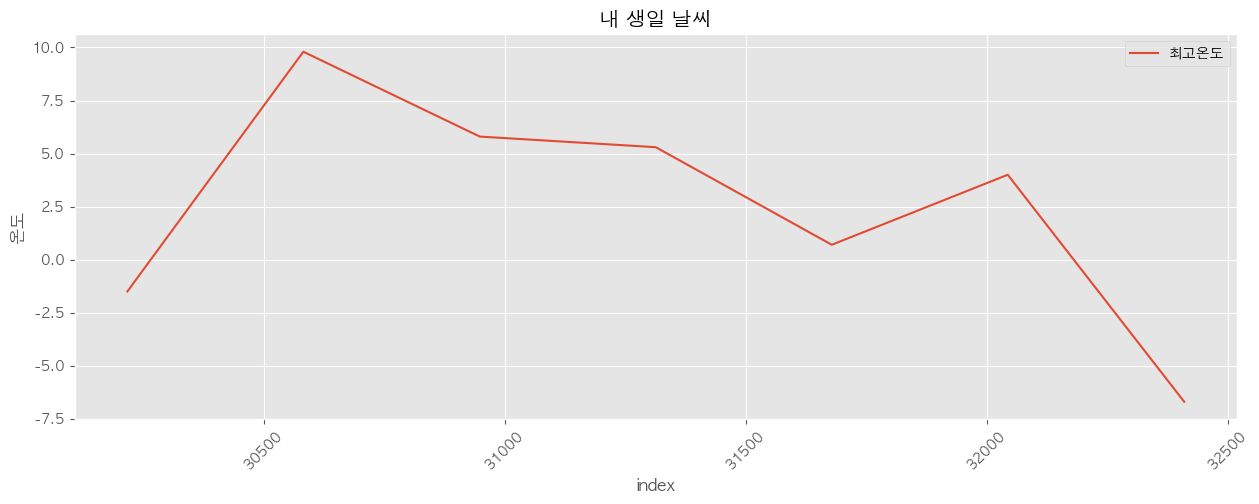

In [24]:
plt.style.use('ggplot')
plt.figure(figsize=(15,5))
plt.xticks(rotation=45)

plt.plot(wtdf2.index, wtdf2['maxTa'], label='최고온도')

plt.title('내 생일 날씨')
plt.xlabel('index')
plt.ylabel('온도')
plt.legend()

plt.show()

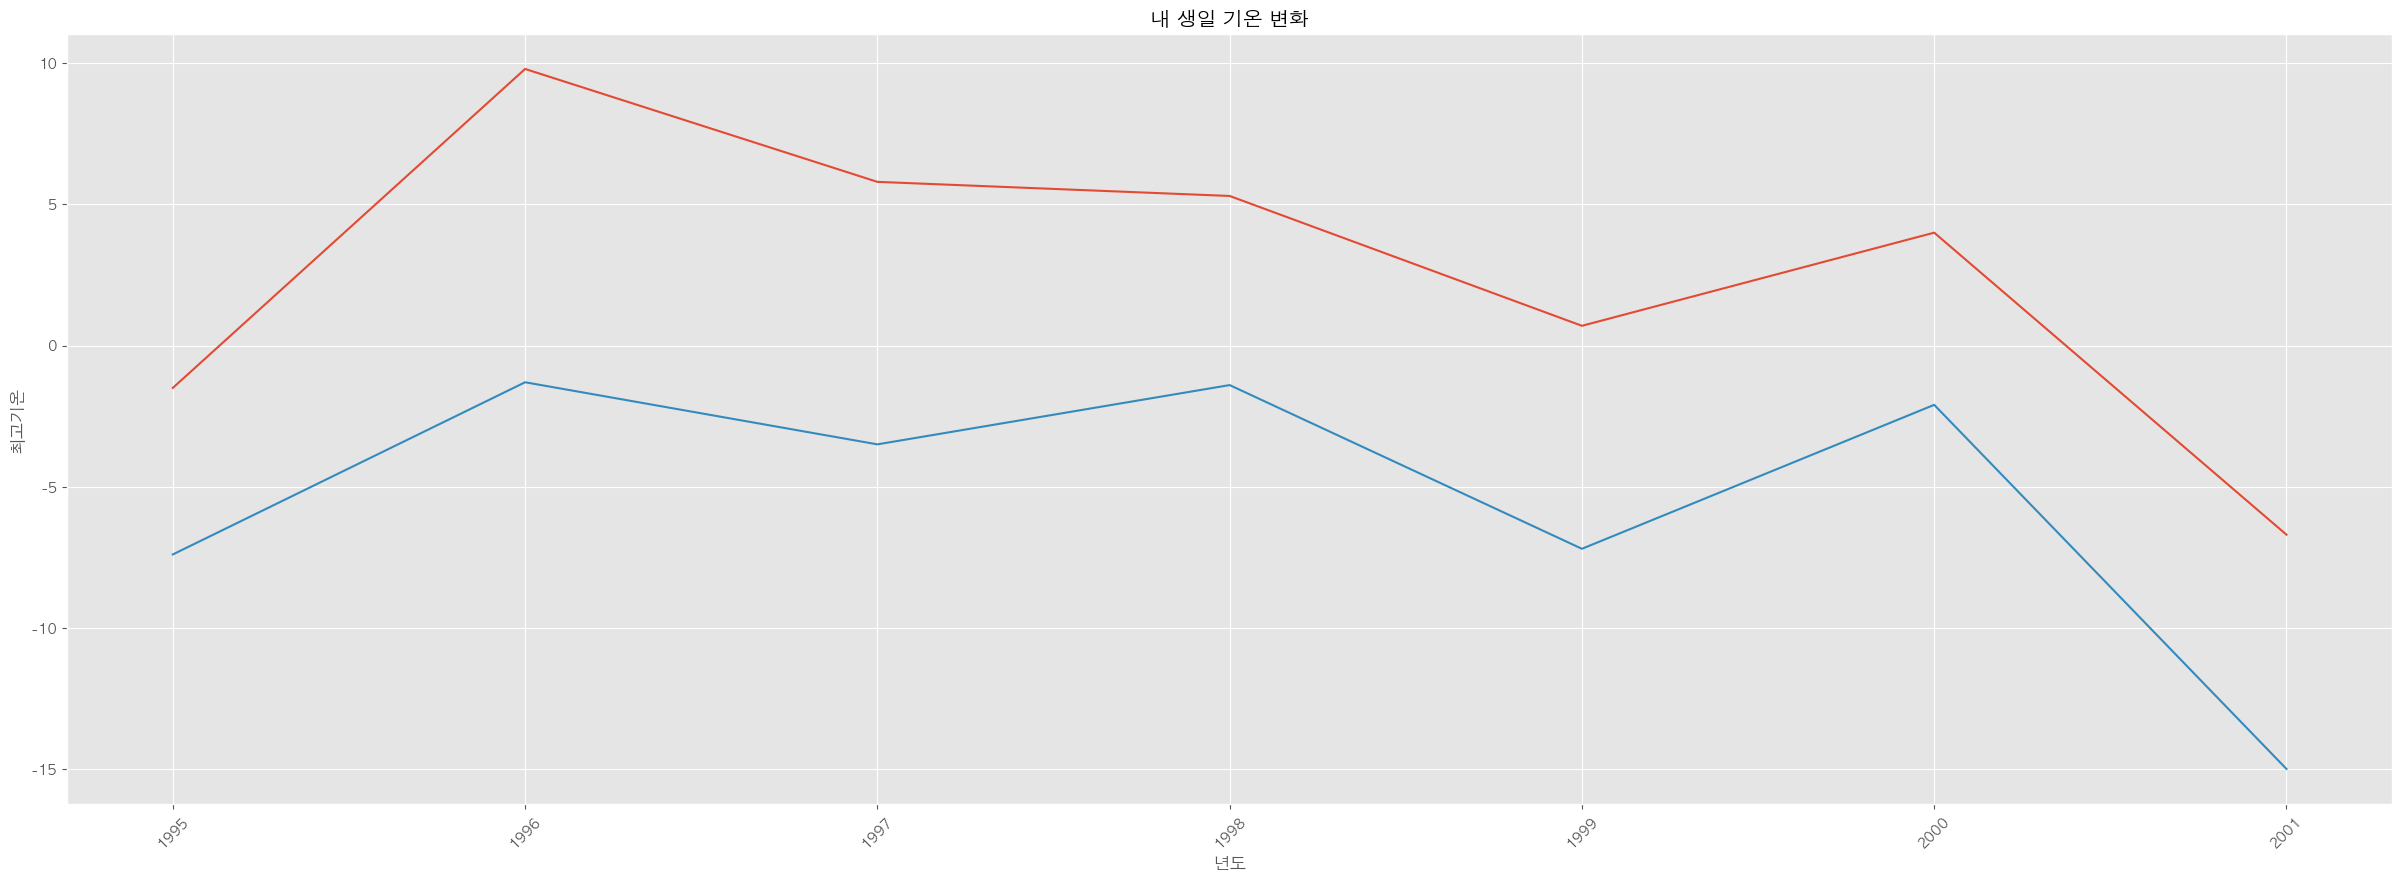

In [35]:
plt.style.use('ggplot')
plt.figure(figsize=(30, 10))
plt.xticks(rotation=45, size=10)

plt.plot(wtdf2['year'], wtdf2['maxTa'], label='최고기온')
plt.plot(wtdf2['year'], wtdf2['minTa'], label='최저기온')
plt.title('내 생일 기온 변화')
plt.xlabel('년도')
plt.ylabel('최고기온')

plt.show()